# Flight Price Prediction
The price of a flight depends on different attributes. Data on these attributes are used to predict the price of a flight

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Loading dataset

In [ ]:
df=pd.read_csv('/content/Clean_Dataset.csv')

Data Processing

In [ ]:
df.shape

(300153, 11)

In [ ]:
df.head()

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0          0
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


# **Data Visualization**

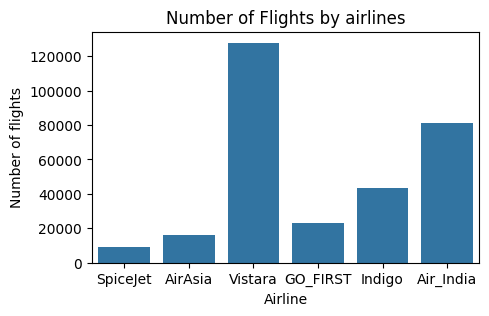

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='airline')
plt.title('Number of Flights by airlines')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.show()

In [ ]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

<ipython-input-11-7c244da2629e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'],color='springgreen')


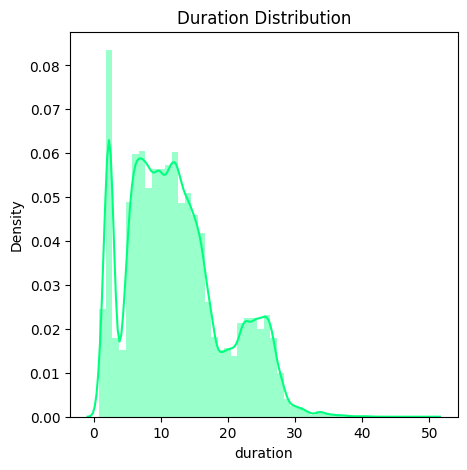

In [ ]:

plt.figure(figsize=(5,5))
sns.distplot(df['duration'],color='springgreen')
plt.title('Duration Distribution')
plt.show()

<ipython-input-12-2c53ff7581ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['days_left'],color='saddlebrown')


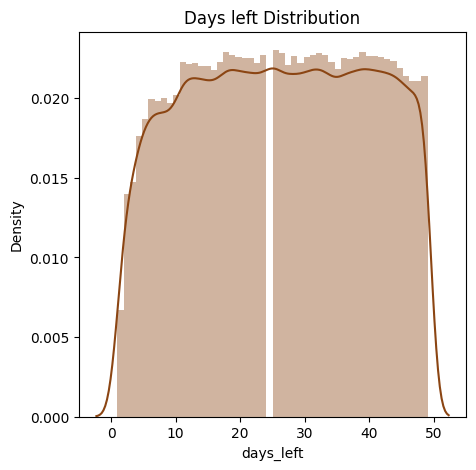

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['days_left'],color='saddlebrown')
plt.title('Days left Distribution')
plt.show()

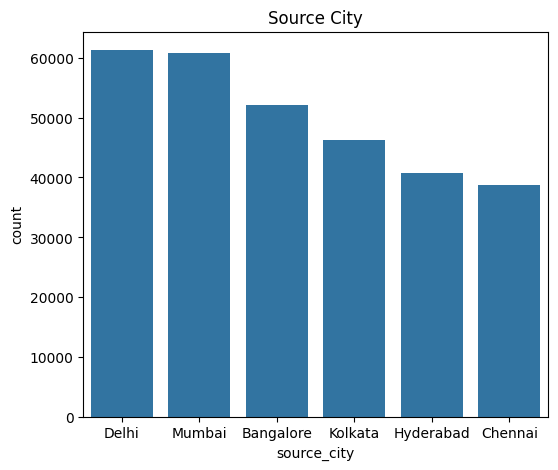

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='source_city', data=df)
plt.title('Source City')
plt.show()

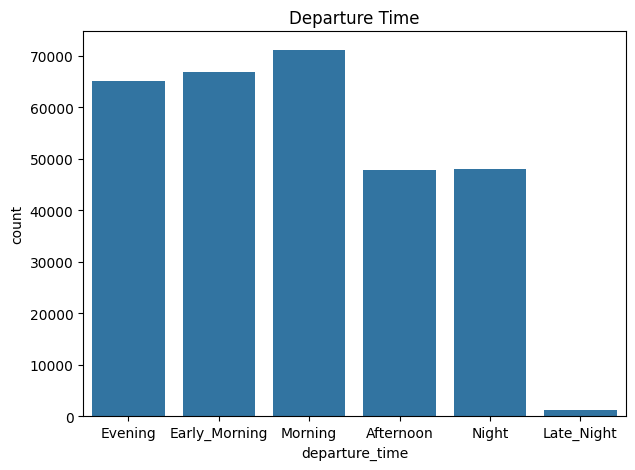

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='departure_time', data=df)
plt.title('Departure Time')
plt.show()

In [ ]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

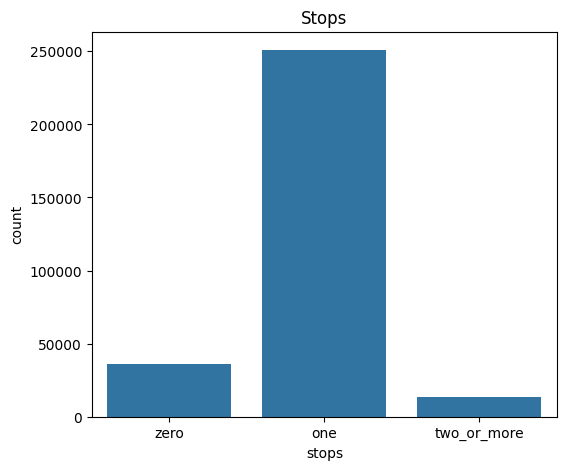

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='stops', data=df)
plt.title('Stops')
plt.show()

In [ ]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

<ipython-input-18-4438d680f1eb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color='steelblue')


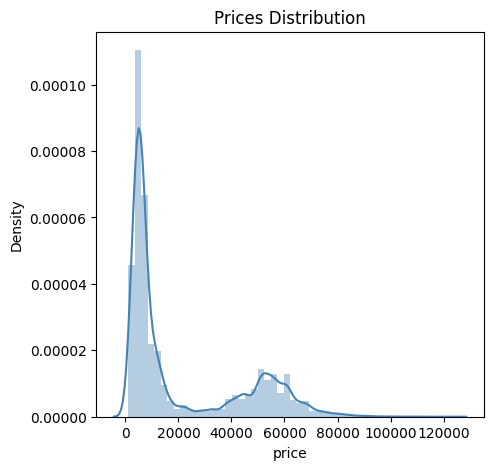

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['price'],color='steelblue')
plt.title('Prices Distribution')
plt.show()

In [ ]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

(-1.099998180778315,
 1.0999997628905251,
 -1.0999991720409774,
 1.0999994123690562)

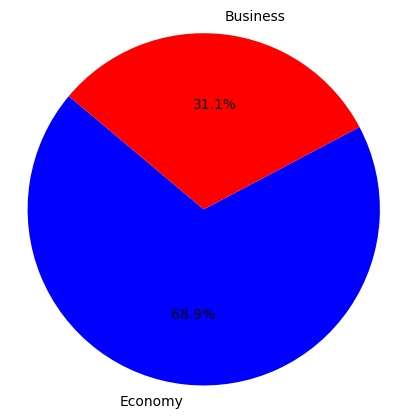

In [ ]:
labels=["Economy","Business"]
sizes=df['class'].value_counts().values
colors = ['blue', 'red']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
startangle=140)
plt.axis('equal')

<Axes: xlabel='class', ylabel='price'>

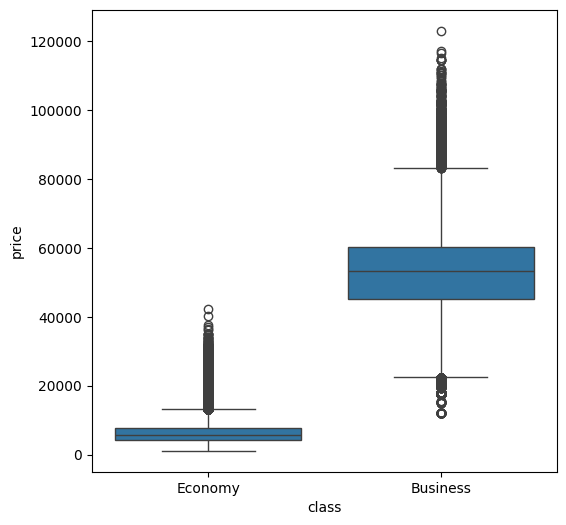

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="class", y="price", data=df)

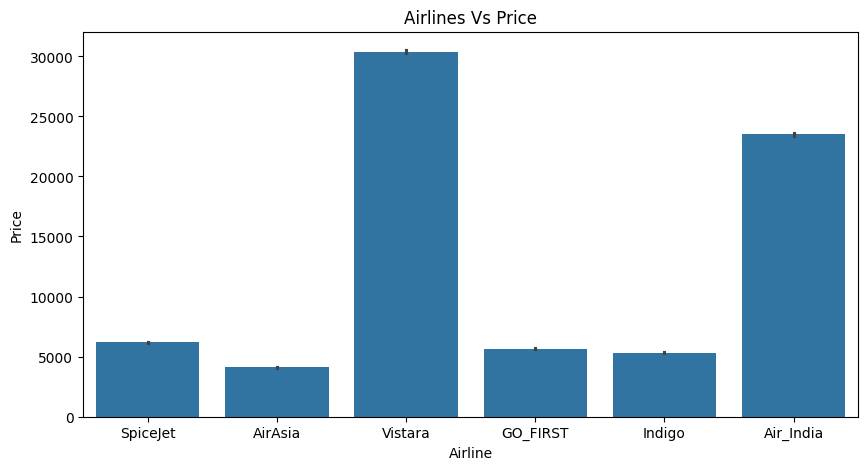

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='airline',y='price')
plt.title('Airlines Vs Price',)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()


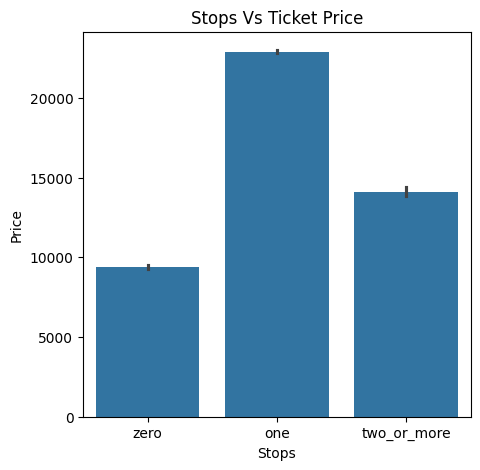

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='stops',y='price',data=df)
plt.title('Stops Vs Ticket Price')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()


In [ ]:
sorted = df.sort_values(by="days_left", ascending=False)

Text(0.5, 1.0, 'Days Left vs Prices')

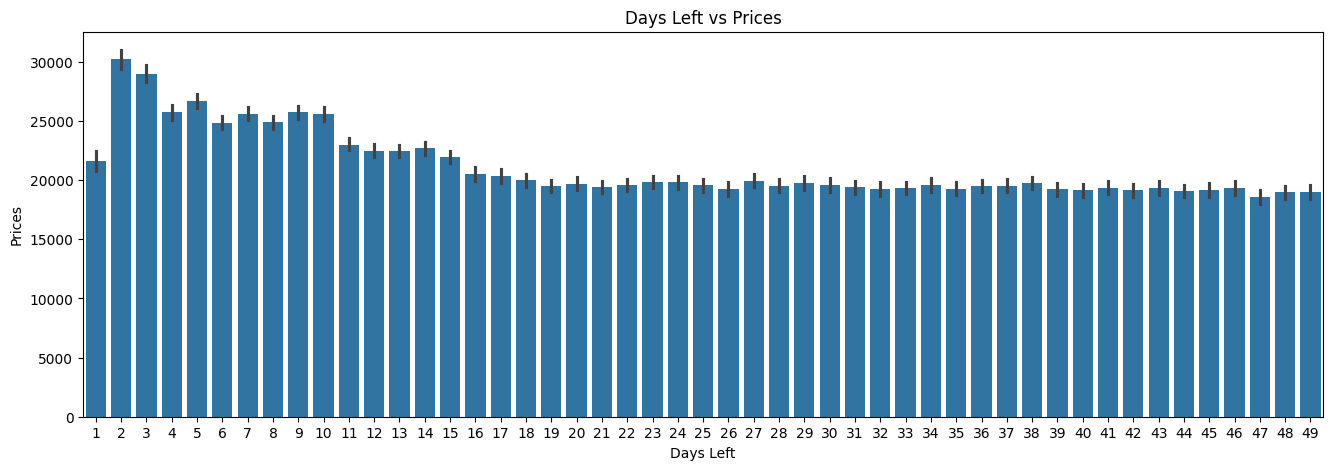

In [ ]:
plt.figure(figsize=(16, 5))
sns.barplot(x='days_left', y='price', data=df)
plt.xlabel('Days Left')
plt.ylabel('Prices')
plt.title('Days Left vs Prices')

In [ ]:
df.replace({'airline':{'SpiceJet':0,'AirAsia':1,'Vistara':2,'GO_FIRST':3,'Indigo':4,'Air_India':5}},inplace=True)
df.replace({'source_city':{'Delhi':0,'Bangalore':1,'Chennai':2,'Hyderabad':3,'Kolkata':4,'Mumbai':5}},inplace=True)
df.replace({'departure_time':{'Evening':0,'Early_Morning':1,'Morning':2,'Afternoon':3,'Late_Night':4,'Night':5}},inplace=True)
df.replace({'stops':{'zero':0,'one':1,'two_or_more':2}},inplace=True)
df.replace({'arrival_time':{'Evening':0,'Early_Morning':1,'Morning':2,'Afternoon':3,'Late_Night':4,'Night':5}},inplace=True)
df.replace({'destination_city':{'Delhi':0,'Bangalore':1,'Chennai':2,'Hyderabad':3,'Kolkata':4,'Mumbai':5}},inplace=True)
df.replace({'class':{'Economy':0,'Business':1}},inplace=True)

In [ ]:
df.head()

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,0,5,5,0,2.17,1,5953
1,1,0,0,1,0,2,5,0,2.33,1,5953
2,2,1,0,1,0,1,5,0,2.17,1,5956
3,3,2,0,2,0,3,5,0,2.25,1,5955
4,4,2,0,2,0,2,5,0,2.33,1,5955


## Defining Variables

In [ ]:
X=df.drop(columns=['price','Unnamed: 0'],axis=1)
Y=df['price']

In [ ]:
print(X)

        airline  source_city  departure_time  stops  arrival_time  \
0             0            0               0      0             5   
1             0            0               1      0             2   
2             1            0               1      0             1   
3             2            0               2      0             3   
4             2            0               2      0             2   
...         ...          ...             ...    ...           ...   
300148        2            2               2      1             0   
300149        2            2               3      1             5   
300150        2            2               1      1             5   
300151        2            2               1      1             0   
300152        2            2               2      1             0   

        destination_city  class  duration  days_left  
0                      5      0      2.17          1  
1                      5      0      2.33          1  
2     

In [ ]:
print(Y)

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64


## Splitting into Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=19)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(300153, 9) (240122, 9) (60031, 9)


Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

##Accuracy of the Linear Regression Model

In [ ]:
from sklearn import metrics

In [ ]:
x_train_prediction=model.predict(X_train)
R2=metrics.r2_score(Y_train,x_train_prediction)
print('r square is',R2)

r square is 0.9037329763127432


In [ ]:
x_test_prediction=model.predict(X_test)
R2=metrics.r2_score(Y_test,x_test_prediction)
print('r square is ',R2)

r square is  0.9041061969633294


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=100)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
X_train_prediction=rf.predict(X_train)

Accuracy of Random Forest Regressor

In [ ]:
r2train=metrics.r2_score(Y_train,X_train_prediction)
print('r square is ',r2train)

r square is  0.9975328146770458


In [ ]:
X_test_prediction=rf.predict(X_test)
r2test=metrics.r2_score(Y_test,X_test_prediction)
print('r square is',r2test)

r square is 0.9852596672127778


Actual vs Predicted Values

In [ ]:
Y_test=list(Y_test)

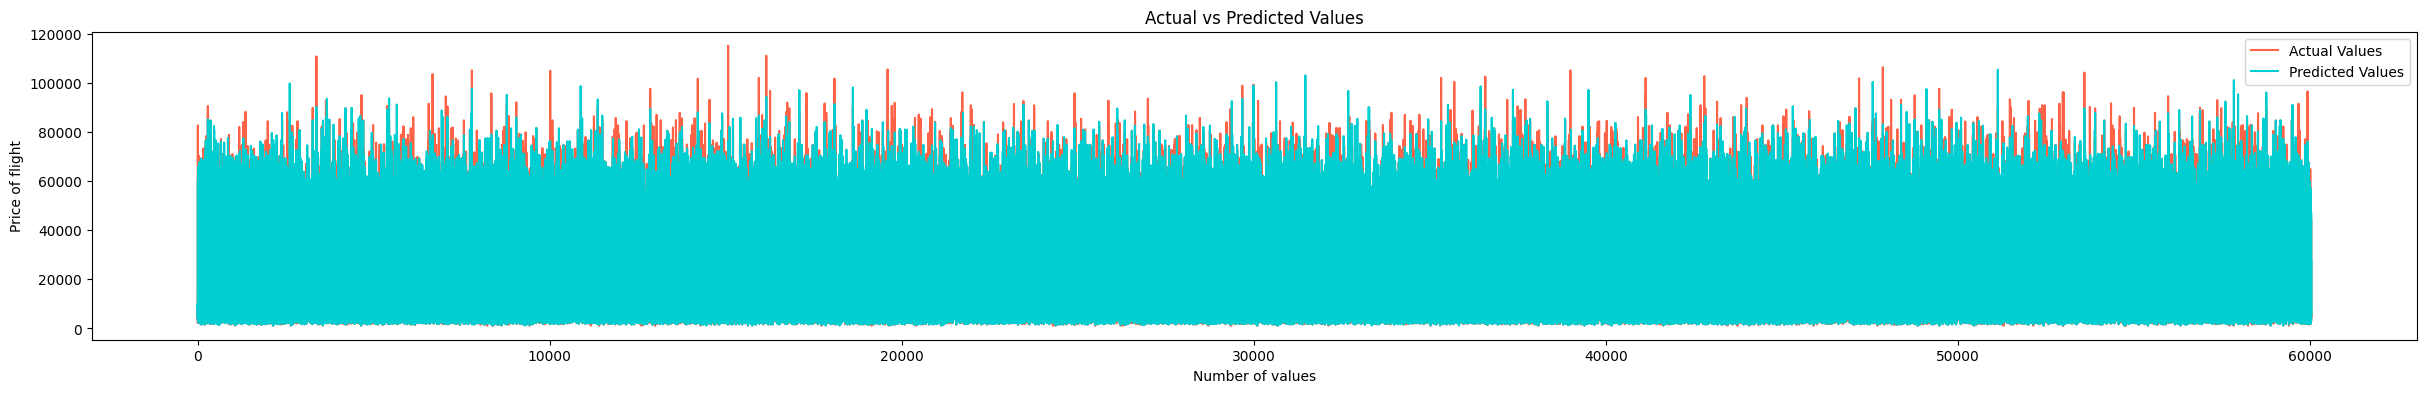

In [ ]:
plt.figure(figsize=(30,4))
plt.plot(Y_test,color='tomato',label='Actual Values')
plt.plot(X_test_prediction,color='darkturquoise',label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('Price of flight')
plt.legend()
plt.show()

User Interface

In [ ]:
airline=input("Enter airline name- SpiceJet,AirAsia,Vistara,GO_FIRST,Indigo,AirIndia: ")
if airline=='SpiceJet':
  airline1=0
elif airline=='AirAsia':
  airline1=1
elif airline=='Vistara':
  airline1=2
elif airline=='GO_FIRST':
  airline1=3
elif airline=='Indigo':
  airline1=4
else:
  airline1=5
source_city=input("Enter source city-Delhi,Bangalore,Chennai,Hyderabad,Kolkata,Mumbai:  ")
if source_city=='Delhi':
  source_city1=0
elif source_city=='Bangalore':
  source_city1=1
elif source_city=='Chennai':
  source_city1=2
elif source_city=='Hyderabad':
  source_city1=3
elif source_city=='Kolkata':
  source_city1=4
else:
  source_city1=5
departure_time=input("Enter departure time-Evening,Early_Morning,Morning,Afternoon,Late_Night,Night:  ")
if departure_time=='Evening':
  departure_time1=0
elif departure_time=='Early_Morning':
  departure_time1=1
elif departure_time=='Morning':
  departure_time1=2
elif departure_time=='Afternoon':
  departure_time1=3
elif departure_time=='Late_Night':
  departure_time1=4
else:
  departure_time1=5
stops=input("Enter number of stops-zero,one,two_or_more:  ")
if stops=='zero':
  stops1=0
elif stops=='one':
  stops1=1
else:
  stops1=2
arrival_time=input("Enter arrival time-Evening,Early_Morning,Morning,Afternoon,Late_Night,Night: ")
if arrival_time=='Evening':
  arrival_time1=0
elif arrival_time=='Early_Morning':
  arrival_time1=1
elif arrival_time=='Morning':
  arrival_time1=2
elif arrival_time=='Afternoon':
  arrival_time1=3
elif arrival_time=='Late_Night':
  arrival_time1_time1=4
else:
  arrival_time1=5
destination_city=input("Enter destination_city-Delhi,Bangalore,Chennai,Hyderabad,Kolkata,Mumbai:  ")
if destination_city=='Delhi':
  destination_city1=0
elif destination_city=='Bangalore':
  destination_city1=1
elif destination_city=='Chennai':
  destination_city1=2
elif destination_city=='Hyderabad':
  destination_city1=3
elif destination_city=='Kolkata':
  destination_city1=4
else:
  destination_city1=5
classs=input("Enter class-Business/Economy:  ")
if classs=='Business':
  class1=0
else:
  class1=1
duration=float(input("Enter duration of flight: "))
days_left=int(input("Enter days left:  "))

Prediction

In [ ]:
input=(airline1,source_city1,departure_time1,stops1,arrival_time1,destination_city1,class1,duration,days_left)
inputn=np.asarray(input)
inputr=inputn.reshape(1,-1)
prediction=rf.predict(inputr)
print(prediction)

In [ ]:
print("The price of the flight is Rs.",prediction[0])
